# <span style="color:dark green"> Projet 5</span>

### <span style="color:dark green"> Optimisez la gestion des données d'une boutique avec Python

# <span style="color:dark green"> SYNTHÈSE</span>

Dans cette présentation, j'utilise Pandas, Numpy, Matplotlib et Seaborn, pour analyser et répondre aux questions liées aux ventes en ligne et en boutique. Dans cette analyse, j'utilise Jupyter Notebook.

# <span style="color:dark green">Problématique</span>

1.Rapprochement de deux exports.

2.Chiffre d'affaires par produit et total du chiffre d'affaires réalisé en ligne.

3.Détection et traitement des outliers

# <span style="color:dark green"> Les Librairies</span>

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# <span style="color:dark green">1.Rapprochement de deux exports</span>

> ## <span style="color:dark green">1.2 Chargement et affichage des données data_erp

In [153]:
# chargement et affichage des données
data_erp = pd.read_excel(r'C:\Users\s\Desktop\P_5\exports\erp.xlsx')
data_erp.head()

C:\Users\s\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


>> ## <span style="color:dark green">1.2.1 Exploration des données

In [154]:
# displaying dataframe shape 
print('La taille du DataFrame est: ', data_erp.shape)

La taille du DataFrame est:  (825, 5)


In [155]:
# Vérifier les types de colonnes
data_erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [156]:
# Vérifier les valeurs manquantes
data_erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [157]:
# Doublons
data_erp.loc[data_erp[['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status']].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [ ]:
>> ## <span style="color:dark green">1.2.2 Test 

In [158]:
#Test d'unicité de la clé primaire
input_size=data_erp.size
deduplicated_size=data_erp.drop_duplicates("product_id").size
print(input_size)

4125


Ici, nous comparons la taille du fichier lorsque nous le recevons et la taille du fichier lorsque nous faisons un drop_duplicate de la clé primaire, pour tester la clé primaire.
Ensuite, nous allons tester si la clé primaire est unique.

In [159]:
print(deduplicated_size)

4125


In [160]:
# Statistiques rapides
data_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


> ## <span style="color:dark green">1.3 Chargement et affichage des données data_web

In [161]:
data_web = pd.read_excel(r'C:\Users\s\Desktop\P_5\exports\web.xlsx')
data_web.head()


C:\Users\s\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


>> ## <span style="color:dark green">1.3.1 Exploration des données

In [162]:
# Nombre des rangées
print('La taille du DataFrame est: ',data_web.shape)

La taille du DataFrame est:  (1513, 28)


In [163]:
# Valeurs manquantes
data_web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [164]:
# Total de données dans notre fichier data_web
print('La taille du DataFrame est la suivante: ',data_web.size)

La taille du DataFrame est la suivante:  42364


In [165]:
 # Isolation des données null dans la clé primaire
primarykey_null = data_web[data_web['sku'].isnull()] 
primarykey_null.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
#recherche des doublons sur la colonne sku
data2_notnull = data_web[data_web['sku'].notnull()] 
data2_notnull

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [167]:
# examinons un sku dans le fichier (isolation des valeurs atipiques)
data_web_sku = pd.DataFrame(data2_notnull[data2_notnull['sku'] == 'bon-cadeau-25-euros'])
data_web_sku

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1209,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [168]:
 # Isolation des données 
web_post_type = pd.DataFrame(data2_notnull[ data2_notnull.post_type == 'product'])
web_post_type

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [169]:
# Nombre des rangées
web_post_type.dropna(subset=['sku'], inplace=True)
web_post_type.shape

(714, 28)

In [170]:
# exploration des valeurs null
web_post_type.isnull().sum()

sku                        0
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                714
post_author                0
post_date                  0
post_date_gmt              0
post_content             714
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            714
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    714
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           714
comment_count              0
dtype: int64

In [171]:
# Définir dans quelles colonnes chercher les valeurs notnull. 
data2_notnull.dropna(subset=['sku'], inplace=True)
data2_notnull

<ipython-input-171-bf93f37eab60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_notnull.dropna(subset=['sku'], inplace=True)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [172]:
# test de l’unicité la clé (doubloons clé)
size_sk=data2_notnull.loc[data2_notnull[['sku']].duplicated(keep=False),:].size
size_sk

39984

In [173]:
size_type_sk=web_post_type.loc[web_post_type[['sku']].duplicated(keep=False),:].size
size_type_sk

0

In [174]:
# visualisation de cette valeur null
web_post_type[web_post_type.sku.isnull()]


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [175]:
web_post_type.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


> ## <span style="color:dark green">1.4 Chargement et affichage des données data_liaison

In [176]:
# chargement et affichage des données
data_liaison = pd.read_excel(r'C:\Users\s\Desktop\P_5\exports\liaison.xlsx')
data_liaison.head()

C:\Users\s\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


>> ## <span style="color:dark green">1.4.1 Exploration des données

In [177]:
# Nombre des rangées
print('La taille du DataFrame est: ',data_liaison.shape)

La taille du DataFrame est:  (825, 2)


In [178]:
# Vérifier les types de colonnes
data_liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [179]:
# Visualisation des valeurs notnull
data_liaison.notnull().sum()

product_id    825
id_web        734
dtype: int64

In [180]:
# Visualisation de cette valeur notnull
data_liaison[data_liaison.notnull()]


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


> ## <span style="color:dark green">1.5 Réalisation de jointures</span>

Pour ce cas, j'ai choisi une jointure externe.

La jointure externe fusionne les deux DataFrames (data_liaison, data_erp) et reflète essentiellement le résultat de la combinaison d'une jointure externe gauche et droite.

Cette jointure permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne.

>> ## <span style="color:dark green">1.5.1 Jointure entre le fichier "liaison" et le fichier "erp"

In [181]:
data_jointure = pd.merge(data_liaison, data_erp, on= ['product_id'], how='outer', indicator=True )
data_jointure.head(10)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge
0,3847,15298,1,24.2,0,outofstock,both
1,3849,15296,1,34.3,0,outofstock,both
2,3850,15300,1,20.8,0,outofstock,both
3,4032,19814,1,14.1,0,outofstock,both
4,4039,19815,1,46.0,0,outofstock,both
5,4040,15303,1,34.3,0,outofstock,both
6,4041,14975,1,32.7,15,instock,both
7,4042,16042,1,31.2,34,instock,both
8,4043,14980,1,60.0,12,instock,both
9,4045,16041,1,42.6,66,instock,both


>> ## <span style="color:dark green"> 1.5.2 Exploration des données

In [182]:
df_test_both=data_jointure[data_jointure['_merge']!='both']
df_test_both.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,_merge


In [183]:
data_jointure=data_jointure.drop(['_merge'],axis=1)

In [184]:
data_jointure.shape

(825, 6)

>> ## <span style="color:dark green">1.5.4  Jointure II, entre le fichier "data_jointure_1" et le fichier "web_post_type"

In [185]:
data_jointure_final = pd.merge(data_jointure, web_post_type, left_on = ['id_web'], right_on=['sku'], how='outer', indicator=True )
data_jointure_final.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


>> ## <span style="color:dark green"> 1.5.5 Exploration des données

In [186]:
df_test_both=data_jointure_final[data_jointure_final['_merge']=='both']
df_test_both.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,15298,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,15296,1,34.3,0,outofstock,15296,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,15300,1,20.8,0,outofstock,15300,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,19814,1,14.1,0,outofstock,19814,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,19815,1,46.0,0,outofstock,19815,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [208]:
df_final_both=df_test_both.drop(['_merge'],axis=1)

In [210]:
df_final_both.shape

(714, 34)

In [211]:
#Exploration des données manquantes
df_final_both.notnull().sum()

product_id               714
id_web                   714
onsale_web               714
price                    714
stock_quantity           714
stock_status             714
sku                      714
virtual                  714
downloadable             714
rating_count             714
average_rating           714
total_sales              714
tax_status               714
tax_class                  0
post_author              714
post_date                714
post_date_gmt            714
post_content               0
post_title               714
post_excerpt             714
post_status              714
comment_status           714
ping_status              714
post_password              0
post_name                714
post_modified            714
post_modified_gmt        714
post_content_filtered      0
post_parent              714
guid                     714
menu_order               714
post_type                714
post_mime_type             0
comment_count            714
dtype: int64

In [212]:
df_final_both.describe()

,product_id,onsale_web,price,stock_quantity,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.000000,714.0,714.000000,714.000000,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,5032.557423,1.0,32.493137,28.746499,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,790.510878,0.0,27.810525,48.012608,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,3847.000000,1.0,5.200000,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,4280.250000,1.0,14.100000,2.000000,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,4796.000000,1.0,23.550000,12.000000,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,5710.500000,1.0,42.175000,35.000000,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,7338.000000,1.0,225.000000,578.000000,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


# <span style="color:dark green">2 Calcul du Chiffre d'Affaire</span>

Le chiffre d’affaires est le montant total hors taxe des ventes de biens et prestations réalisées par l'entreprise BottleNeck, dans le cadre de son activité, pour une période donnée. C’est un indicateur clé pour le suivi de performance. Utilisé avec d’autres indices, il va nous permettre de développer des analyses et comparaisons dans le temps. 



> ## <span style="color:dark green">2.1 Exploration des variables

In [213]:
df_final_both['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [214]:
df_final_both['total_sales'].describe()

count    714.000000
mean       4.012605
std        8.518183
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       96.000000
Name: total_sales, dtype: float64

> ## <span style="color:dark green">2.2 Les produits qui génèrent le plus de chiffre d'affaire

In [221]:
# 5 produits qui generent le plus de CA
df_final_both['CA']= df_final_both['price']*df_final_both['total_sales']
df_final_both[['product_id', 'price', 'total_sales', 'CA']].sort_values('CA', ascending=False).head()

,product_id,price,total_sales,CA
286,4334,49.0,96.0,4704.0
162,4144,49.0,87.0,4263.0
310,4402,176.0,13.0,2288.0
161,4142,53.0,30.0,1590.0
160,4141,39.0,40.0,1560.0


> ## <span style="color:dark green">2.3 Les produits qui génèrent le moins de chiffre d'affaire

In [223]:
# 5 Produit sans aucune vente
df_final_both['CA']= df_final_both['price']*df_final_both['total_sales']
df_final_both[['product_id', 'price', 'total_sales', 'CA']].sort_values('CA', ascending=True).head()

,product_id,price,total_sales,CA
824,7338,16.3,0.0,0.0
434,4759,16.9,0.0,0.0
433,4758,24.3,0.0,0.0
724,5962,30.0,0.0,0.0
431,4755,7.4,0.0,0.0


> ## <span style="color:dark green">2.4 Chiffre d'affaire total géneré par les ventes en ligne

In [225]:
# Chiffre d'affaires total en ligne
print('Le CA par les ventes en ligne est de', df_final_both['CA'].sum(), '€')

Le CA par les ventes en ligne est de 70568.6 €


# <span style="color:dark green">3 Détection et traitement des valeurs aberrantes</span>

Une valeur aberrante est une valeur extrême, anormalement différente de la distribution d’une variable. En d’autres termes, la valeur de cette observation diffère grandement des autres valeurs de la même variable.
Bien avant la phase d’apprentissage, les valeurs aberrantes influencent certains paramètres statistiques, comme la moyenne. Cela peut modifier notre compréhension du jeu de données et nous conduire à émettre des hypothèses erronées sur ce dernier. Détecter ses Outliers nous permettra de faire des suppositions plus aguerries.

> ## <span style="color:dark green">3.1 Exploration des valeurs aberrantes

In [226]:
df_final_both['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

>Dans une première approximation, après avoir regardé le maximum et le minimum.  Nous voyons un montant maximum de 225 (ce qui correspondrait à un produit haut de gamme). Cela semble plutôt surprenant étant donné que l'achat minimum correspond à 5,2, ce qui nous indique la grande diversité du public avec lequel nous travaillons.

> ## <span style="color:dark green">3.2 Distribution normale

C:\Users\s\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


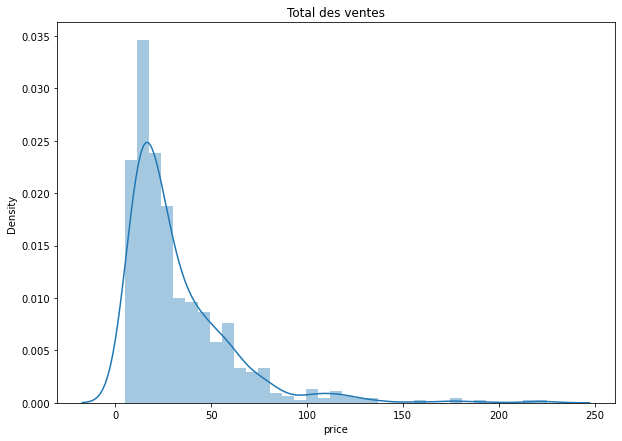

In [227]:
plt.figure(figsize=(10,7))
sns.distplot(df_final_both['price']).set_title('Total des ventes');

>->Le graphique de la distribution normale révèle que la médiane est éloignée des valeurs de droite, qui présentent des montants supérieurs à 100 euros, il révèle également que la plupart des achats sont compris entre 5 et 30 euros.

> ## <span style="color:dark green">3.3 Mesures de la dispersion

>>>Coefficient de variation: Le CV est une mesure utilisée pour décrire la précision d'une estimation.     
Le coefficient de variation (CV) est le rapport de l'écart-type à la moyenne. Plus la valeur du coefficient de variation est élevée, plus la dispersion autour de la moyenne est grande

In [228]:
#fonction pour calculer le coeff de variation cv

cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 
#calcul CV
print('La dispersion des prix autour de la moyenne est très elevée avec', round(cv(df_final_both['price'])),'%', " Donc elle est très influencé par l'écart-type")

La dispersion des prix autour de la moyenne est très elevée avec 86 %  Donc elle est très influencé par l'écart-type



> ## <span style="color:dark green">3.4 Calcul des quartiles

>>> Calcul des quartiles: Pour calculer l’étendue, il suffit de trouver la plus grande valeur observée d’une variable (le maximum) et de lui soustraire la plus petite valeur observée (le minimum).
Dans cette présentation, nous allons suivre l'approche IQR pour filtrer et traiter les valeurs aberrantes. Comme nous le savons, la limite inférieure de toute observation est Q1 -15* IQR et la limite supérieure est Q3 +1.5* IQR

In [230]:
# Importation du modile stats de Scipy

from scipy import stats

# Fonciotn pour trouver les outliers
# valeur < Q1 - 1.5QR ou caleur > Q3 + 1.5QR (nous sommes faces à valeur aberrantes)

def finding_outliers(df_final_both, price):
    '''
    data_jointure_final: dataframes Pandas
    price: nom de la variable donc chaîne des caractères
    '''
    # Calcul de l'IQR
    iqr = stats.iqr(df_final_both[price])
    q1 = df_final_both[price].quantile(0.25)
    q3 = df_final_both[price].quantile(0.75)
    
    #Calcul de Q1 - 1.5QR et de Q3 + 1.5QR
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    print('IQR =', "{:.2f}".format(iqr))
    print('Q1 =', "{:.2f}".format(q1))
    print('Q3 =', "{:.2f}".format(q3))
    print('lower =', "{:.2f}".format(lower))
    print('upper =',  "{:.2f}".format(upper))
    
    #dataframe des valeur aberrantes
    outliers_df=  df_final_both[(df_final_both[price] < lower) | ( df_final_both[price] > upper)]
    return outliers_df

> ## <span style="color:dark green">3.5 Liste des outliers

In [231]:
#outliers

data_outliers=finding_outliers(df_final_both = df_final_both, price = 'price')

print("Les valeur outliers sont:")
data_outliers['price']

IQR = 28.08
Q1 = 14.10
Q3 = 42.18
lower = -28.01
upper = 84.29
Les valeur outliers sont:


154    100.0
156     88.4
291    225.0
293    126.5
297     85.6
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
539     86.8
605     92.0
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64

In [232]:
data_outliers.shape

(32, 35)

> ## <span style="color:dark green">3.5 Boîte à moustaches sur une distribution normale

>Ces graphiques se basent sur la mediane, ainsi que les quartiles inférieur et superieur Q_{1} et Q_{3} respectivement.

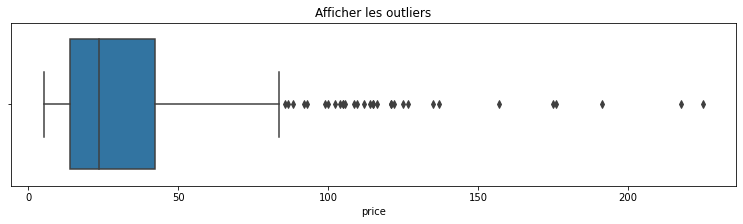

In [233]:
#plt.figure(figsize=(13,8))
#sns.boxplot(x=data_jointure_final['price'])

plt.figure(figsize=(13,3))
sns.boxplot(x= 'price', data=df_final_both).set_title('Afficher les outliers');

>->Comme on peut le voir, la boîte à moustaches illustre que les données de prix sont faussées vers la droite. C'est-à-dire qu'il y a des valeurs aberrantes sur la partie droite maximale.


> ## <span style="color:dark green">3.6 Représentation graphique des outliers

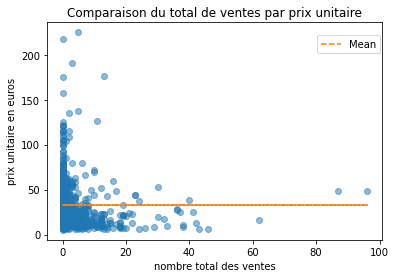

In [234]:
#Visualisation détaillée du prix moyen
y = df_final_both["price"]
x = df_final_both['total_sales']

y_mean = [np.mean(y)]*len(x)

plt.scatter
fig,ax = plt.subplots()

plt.plot(df_final_both['total_sales'],df_final_both["price"],'o',alpha=0.5)

mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
y_mean = [np.mean(y)]*len(x)

plt.title('Comparaison du total de ventes par prix unitaire')
plt.legend(loc="center", bbox_to_anchor=(.9,.9))
plt.xlabel("nombre total des ventes")
plt.ylabel("prix unitaire en euros")

plt.show()

(     product_id   id_web  onsale_web  price  stock_quantity stock_status  \
 0          3847    15298           1   24.2               0   outofstock   
 1          3849    15296           1   34.3               0   outofstock   
 2          3850    15300           1   20.8               0   outofstock   
 3          4032    19814           1   14.1               0   outofstock   
 4          4039    19815           1   46.0               0   outofstock   
 ..          ...      ...         ...    ...             ...          ...   
 820        7023    15891           1   27.5              15      instock   
 821        7025    15887           1   69.0               2      instock   
 822        7247  13127-1           1   54.8              23      instock   
 823        7329  14680-1           0   26.5              14      instock   
 824        7338    16230           1   16.3              45      instock   
 
          sku  virtual  downloadable  rating_count  ...   post_modified_gm

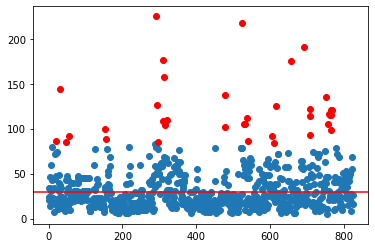

In [235]:
#Visualisation détaillée des outliers

# On se créé 2 DataFrame pour séparé les couleurs
def finding_outliers(df_final_both, price):
    
    iqr = stats.iqr(df_final_both[price])
    q1 = df_final_both[price].quantile(0.25)
    q3 = df_final_both[price].quantile(0.75)
    
    #Calcul de Q1 - 1.5QR et de Q3 + 1.5QR
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    lower_bound=lower
    upper_bound= upper
    
    only_ok = df_final_both[(df_final_both['price'] < upper_bound) & (df_final_both['price'] > lower_bound)]
    only_outliers = df_final_both[(df_final_both['price'] > upper_bound) | (df_final_both['price'] < lower_bound)]
    plt.axhline(y=30, color='r', label='Mean', linestyle='-')
    
    # On plot
    plt.scatter(only_ok['price'].index, only_ok['price'].values)
    plt.scatter(only_outliers['price'].index, only_outliers['price'].values,c='red')
    return only_ok, only_outliers
    

finding_outliers(data_jointure_final,'price')

> ## <span style="color:dark green">3.6 Représentation des CA des outliers

In [206]:
# Chiffre d'affaire des produits "outliers"
print('Le total estimé des outliers dans le total des CA est de', data_outliers['CA'].sum(), '€')

Le total estimé des outliers dans le total des CA est de 6970.0 €


In [236]:
prop_ca=(data_outliers['CA'].sum()/df_final_both['CA'].sum())*100
print("Le pourcentage que les outliers représentent dans le total des CA en ligne est de:", "{:.2f}".format(prop_ca),"%")

Le pourcentage que les outliers représentent dans le total des CA en ligne est de: 9.88 %


### Conclusion :

La boutique représente actuellement le CA le plus important de l'entreprise.

En ce qui concerne le CA par produit, il faut regarder très attentivement les produits qui n'intéressent pas la clientèle, ni en boutique ni en ligne. Car on constate qu'il y a plus de 30 produits qui n'ont jamais été vendus.

Il faut prendre en compte que dans les 5 vins ayant le CA le plus important, il y a 3 vins qui dépassent 100€. Et si nous les mettons dans l'ordre de CA, les 2 premiers ont la même valeur (49€), et le troisième a un prix de 176€. 

Les vins qui dépassent le prix moyen, fixé à environ 30 €, sont très intéressants en termes de CA.

Alors que les vins haut de gamme vendus en ligne représentent 9,88% du CA en ligne soit 6970.0 €.



### Recommandations :

Analysez pourquoi il y a des vins qui ne se vendent pas.

Promouvoir le public qui recherche des vins entre 50 et 80 euros.

Dynamiser les ventes en ligne grâce à une campagne de marketing plus agressive.